<a href="https://colab.research.google.com/github/theTURYA/deep-learning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classfication problems is where you try to classify something as one thing or another.

A few types of classification problems:
 * Binary classification
 * Multiclass classification
 * Multilabel classification

## Creating data to view and fit

In [43]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [44]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [45]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

### Our data is little hard to understand right now... let's visualize it!


In [46]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [47]:
circles["label"].value_counts()

,count
label,
1,500
0,500


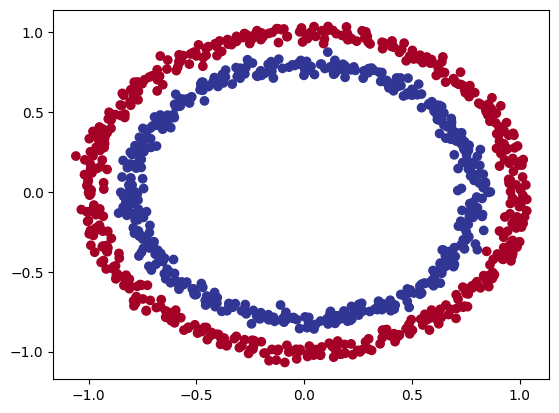

In [48]:
# Visualize with a plot

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [49]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [50]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [51]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate....

In [52]:
import tensorflow as tf

In [53]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics= ["accuracy"])

# 3.Fit the model
model_1.fit(X, y, epochs = 5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4624 - loss: 4.3684
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4724 - loss: 2.4620
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5043 - loss: 0.7381
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5053 - loss: 0.7083
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5074 - loss: 0.6995


In [54]:
# Let's try and improve our model by training for longer...
model_1.fit(X,y, epochs = 200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a Binary classification proble, and our model is getting around ~50% accuracy. It's performing as if it's guessing.

So, let's step things up a notch and add an extra layer.


In [55]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics= ["accuracy"])

# 3.Fit the model
model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5127 - loss: 6.6899   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4305 - loss: 6.2851 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4583 - loss: 6.1074  
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4711 - loss: 5.0535 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4956 - loss: 4.0796
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5007 - loss: 0.7269 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4902 - loss: 0.7070 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4918 - loss: 0.6996 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4892 - loss: 0.6967 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4867 - loss: 0.6955 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4813 - loss: 0.6951 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [56]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 0.6931  


[0.6933307647705078, 0.5]

# Improving our model

Let's look into our bag of tricks to see how can we can improve our model.

1. Create a model: we might add more layers or increase the number of hidden units within a layer.
2. Compiling a model: here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model: perheaps we might fit our model for more numbers of epochs (leave it training for longer).

In [57]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  # add 100 dense neurons
    tf.keras.layers.Dense(10),   # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4555 - loss: 3.8444
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - loss: 0.7241 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4857 - loss: 0.7116 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4997 - loss: 0.6944 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4484 - loss: 0.6953 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4567 - loss: 0.6960 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4562 - loss: 0.6962
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4562 - loss: 0.6965
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4582 - loss: 0.6968 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4615 - loss: 0.6970 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4627 - loss: 0.6973 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

In [58]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5054 - loss: 0.6916  


[0.6955005526542664, 0.48899999260902405]

🔑**Note:** Whenever your model is performing starngely or there;s something going on with your data you're not quite sure of, remember these three word: **Visulaize, visualize, visualize.** Inspect your data, inspect your model, inspect your model's predictions.

To Visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)  

In [59]:
import numpy as np

In [60]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decison boundary created by a model predicting on  X.
  """

  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))


  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = -1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(np.max(y_pred, axis=-1)).reshape(xx.shape)

    # Plot the  decesion boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c= y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


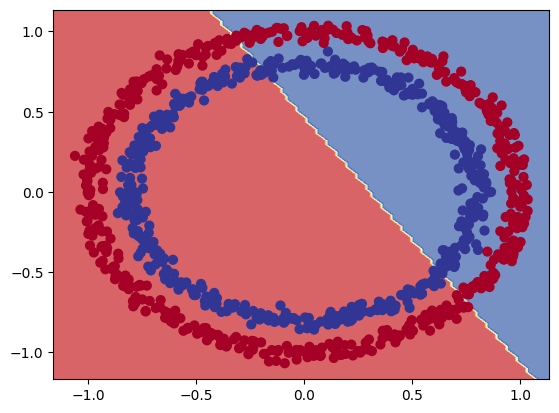

In [61]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X=X, y=y)

In [64]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max , y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [65]:
# Let's see if our modl can be used for regression problem....

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100, 1100, 5)  # y = X + 1000

# Spilt our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_21" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
  • training=True
  • mask=None

We compiled our model for a binary classification problem.

But... we're now workig on a regreesion problem, let's change the model to suit our data.



In [66]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 556.5005 - mae: 556.5005
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 457.9533 - mae: 457.9533 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 358.4900 - mae: 358.4900  
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256.5603 - mae: 256.5603 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 150.1936 - mae: 150.1936 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52.0743 - mae: 52.0743 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 73.8727 - mae: 73.8727  
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.8280 - mae: 77.8280  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.6599 - mae: 51.6599 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 45.0721 - mae: 45.0721 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.6906 - mae: 44.6906  
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.2838 - mae: 42.2838  
Epoch 13/1

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


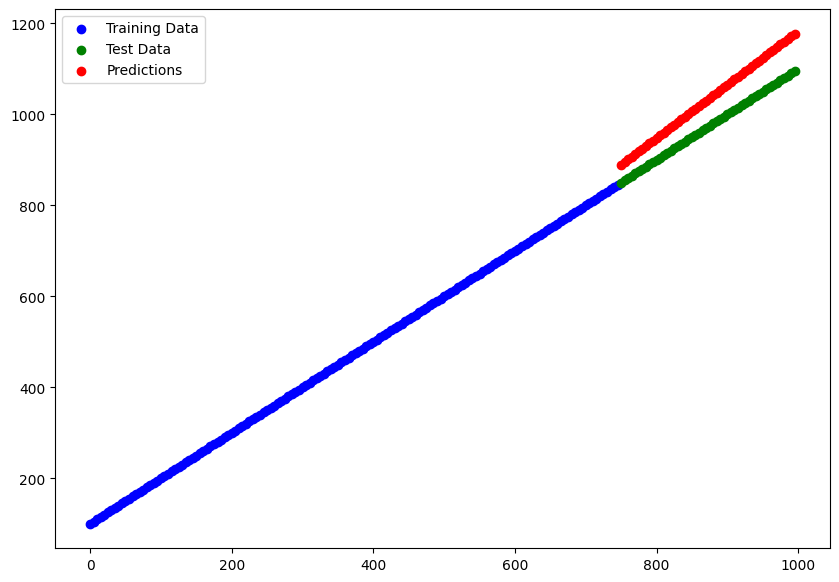

In [67]:
# Make predctions with our trained model
y_reg_preds = model_3.predict(X_reg_test)


# Plot the model's prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c = 'g', label = "Test Data")
plt.scatter(X_reg_test, y_reg_preds, c = 'r', label = "Predictions")
plt.legend()
